In [150]:
import collections
import networkx as nx
import sys
import os
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from tqdm import tqdm
import pickle

In [151]:
graph_collections, graph_name = read_graph("./test-graphs")

{'ABILENE': {'index': 0, 'nodes': 11, 'edges': 14}, 'ABVT': {'index': 1, 'nodes': 23, 'edges': 31}, 'AGIS': {'index': 2, 'nodes': 25, 'edges': 30}, 'ARN.GRAPHML': {'index': 3, 'nodes': 30, 'edges': 29}, 'BELLCANADA': {'index': 4, 'nodes': 48, 'edges': 64}, 'BELLSOUTH.GRAPHML': {'index': 5, 'nodes': 51, 'edges': 66}, 'BICS.GRAPHML': {'index': 6, 'nodes': 33, 'edges': 48}, 'CERNET.GRAPHML': {'index': 7, 'nodes': 41, 'edges': 58}, 'CESNET200706.GRAPHML': {'index': 8, 'nodes': 44, 'edges': 51}, 'CHINANET.GRAPHML': {'index': 9, 'nodes': 42, 'edges': 66}, 'COGENTCO.GRAPHML': {'index': 10, 'nodes': 197, 'edges': 243}, 'COLT.GRAPHML': {'index': 11, 'nodes': 153, 'edges': 177}, 'DELTACOM.GRAPHML': {'index': 12, 'nodes': 113, 'edges': 161}, 'GARR201110.GRAPHML': {'index': 13, 'nodes': 59, 'edges': 74}, 'GEANT2001': {'index': 14, 'nodes': 27, 'edges': 38}, 'GRNET.GRAPHML': {'index': 15, 'nodes': 37, 'edges': 42}, 'INTELLIFIBER.GRAPHML': {'index': 16, 'nodes': 73, 'edges': 95}, 'INTEROUTE.GRAPHML'

In [152]:
G = graph_collections[1]
# geo_loc_data = get_geo_data("Internet2LatLong.csv")
geo_loc_data = {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
                for (k, v) in G.nodes(data=True)}
# print(geo_loc_data)
edge_geo_data_combined = assign_location(G, geo_loc_data)
# set edge attributes
set_edge_attr(G, edge_geo_data_combined)
# G.edges(data=True)


In [153]:
selection__=[0,2,4,23]# [37,41,20,0,14,4,1,2,10, 18, 8]

gGrahps = selection__from_graph(graph_collections, graph_name)  # , selection__

# print(gGrahps)
# assign coordinates: Lat and Long
geo_loc_data_sample = {i: {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
     for (k, v) in g.nodes(data=True)} for i, g in gGrahps}
# print(geo_loc_data_sample)

edge_geo_data_sample = {k: assign_location(u, v) for (k, v), (j,u) in zip(geo_loc_data_sample.items(), gGrahps)}
# print(geo_loc_data_sample)
nx.get_edge_attributes(gGrahps[4][1], 'weight')


{}

In [154]:
# Obtain node strength to the desired degree: 1,2,3,...
node_strength_2_deg = [(i, sum(hub_information(G, i, 2))) 
                       for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
degree__ = [(i, len(n_neighbor(G, i, 1))) for (i, j) in sorted(list(G.degree()),
                                                               key=lambda item: int(item[0]))]


In [155]:
# sources of evidences
source_1, source_2, source_3, source_4, *others = degree__, node_strength_2_deg, eccentricity(G),  approximate_current_flow_betweenness_centrality(G, weight="weight"), current_flow_betweenness_centrality(G), betweenness_centrality(G, weight="weight"),  closeness_centrality(G),      load_centrality(
    G),    #eigenvector_centrality(G),

# print(source_2, source_3)


In [156]:
# combine sources of evidence into a single dictionary
sources_of_evidences = {
    "Degree": {g[0]: [(i, len(n_neighbor(g[1], i, 1))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Node Strength": {g[0]: [(i, sum(hub_information(g[1], i, 2))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Eccentricity": {g[0]: eccentricity(g[1]) for g in gGrahps},
    "Approx Curr. Flow Betwns Cent'y": {g[0]: approximate_current_flow_betweenness_centrality(g[1]) for g in gGrahps}
}
# sources_of_evidences["Degree"]["ABILENE"]

In [157]:
# test case
e_v = 2
varying_examples_multi(source_1, source_2, source_3, source_4,e_v)

[('11', 0.9991533889283354),
 ('1', 0.8102800440940692),
 ('10', 0.43433003311276563),
 ('5', 0.3281087394193372)]

In [158]:
evis = [2,3,4]
selected_nodes_based_on_source ={i:{e: varying_examples_multi(sources_of_evidences["Degree"][i],
sources_of_evidences["Node Strength"][i], 
sources_of_evidences["Eccentricity"][i], 
    sources_of_evidences["Approx Curr. Flow Betwns Cent'y"][i], e) for e in evis} for i, j in gGrahps}
# print(selected_nodes_based_on_source)

selected_nodes_based_on_source_ext = {k2: {k: {x for x, y in sorted(v, key=lambda item: int(item[1]), reverse=True)} for k, v in v2.items()} for k2, v2 in selected_nodes_based_on_source.items()}
# print(selected_nodes_based_on_source_ext)

selected_nodes_based_on_source_ext_len = {k2:{k:len(v) for k,v in v2.items()} for k2,v2 in selected_nodes_based_on_source.items()}


# {i: { "#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "sel_":v} for (i,j), v in zip(gGrahps, selected_nodes_based_on_source.values())}
sel_node_summary={i: {"Graph Name":i, "#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "Diameter":nx.diameter(j), "Density":nx.density(j)}for (i, j)in gGrahps }
sel_to_table = {
    i: (sel_node_summary[i] | selected_nodes_based_on_source_ext[i]) for i, j in gGrahps}
    



In [159]:
sel_node_table = pd.DataFrame.from_dict(
    sel_to_table, orient='index')
# print()
# sel_node_table.to_csv('sel_node_table_w_DSIndex.csv', index=False)


In [160]:
clusters__ = {
    k2: {
        k: cluster_optimal_nodes_test(j, v) for k, v in v2.items()
        }  
        for (i, j), (k2, v2) in zip(
            tqdm(gGrahps), 
            selected_nodes_based_on_source.items()
        ) 
}


100%|██████████| 44/44 [00:03<00:00, 11.33it/s]


In [161]:
selected_nodes_optimal = {k3:{k2:{k for k,v in v2.items() }for k2,v2 in v3.items()} for k3,v3 in clusters__.items()}
sel_to_table_optimal = {i: (sel_node_summary[i] | selected_nodes_optimal[i]) for i, j in gGrahps}

sel_node_table_optimal = pd.DataFrame.from_dict(sel_to_table_optimal, orient='index')
# print()
sel_node_table_optimal.to_csv('sel_node_table_optimal.csv', index=False)


In [162]:
sel_to_table_optimal
sel_node_table_optimal


,Graph Name,#Nodes,#Edges,Diameter,Density,2,3,4
ABILENE,ABILENE,11,14,5,0.254545,"{8, 6, 9, 10}","{2, 7, 1, 6}","{2, 5, 7}"
ABVT,ABVT,23,31,7,0.122530,"{1, 5, 11, 10}","{7, 21, 1, 10}","{0, 2, 1, 11, 5}"
AGIS,AGIS,25,30,7,0.100000,"{3, 19, 6, 10, 9}","{14, 3, 2, 5, 9, 7}","{3, 2, 19, 6, 9}"
ARN.GRAPHML,ARN.GRAPHML,30,29,4,0.066667,"{8, 22, 24}","{8, 4}","{29, 7, 18, 3}"
BELLCANADA,BELLCANADA,48,64,13,0.056738,"{16, 4, 29, 33, 31, 14, 2, 45, 8, 27, 21}","{16, 33, 13, 2, 1, 8, 27, 21, 12}","{16, 33, 13, 2, 17, 1, 8, 27, 21, 12}"
BELLSOUTH.GRAPHML,BELLSOUTH.GRAPHML,51,66,7,0.051765,"{49, 31, 35}","{15, 31, 23, 1, 5, 45}","{48, 42, 33, 31, 50, 46, 19, 26, 28, 49}"
BICS.GRAPHML,BICS.GRAPHML,33,48,8,0.090909,"{15, 13, 14, 19, 1, 22, 21}","{16, 13, 24, 5, 28, 20, 12}","{16, 15, 13, 14, 19, 5, 8, 22}"
CERNET.GRAPHML,CERNET.GRAPHML,41,58,5,0.070732,"{28, 24, 37, 21}","{14, 26, 38, 1, 9, 39, 20, 12}","{16, 25, 32, 30, 26, 38, 39, 27, 20}"
CESNET200706.GRAPHML,CESNET200706.GRAPHML,44,51,6,0.053911,"{0, 40, 7, 43}","{15, 14, 36, 43, 22, 18, 28, 7, 20}","{36, 6, 30, 43, 20, 12}"
CHINANET.GRAPHML,CHINANET.GRAPHML,42,66,4,0.076655,"{25, 23, 38, 28, 39, 8, 27}","{3, 2, 30, 41, 5, 18, 28, 8, 20}","{25, 16, 33, 23, 38, 18, 8}"


In [163]:
[{x:cluster_optimal_nodes_test(
    gGrahps[0][1], selected_nodes_based_on_source["ABILENE"][x])}for x in [2, 3, 4]]


[{2: {'8': {'5', '7'}, '9': {'0', '2'}, '10': {'1'}, '6': {'3', '4'}}},
 {3: {'7': {'10', '5', '8'}, '1': {'0'}, '2': {'9'}, '6': {'3', '4'}}},
 {4: {'7': {'1', '10', '3', '6', '8'}, '2': {'0', '9'}, '5': {'4'}}}]

In [164]:

clusters__dict = { c: {e: {i: set([i]) | j for i, j in f.items()} for e, f in d.items()} for c, d in clusters__.items()}

# print(clusters__dict)
clusters__pair ={x: {e: {u: k for (k, v) in f.items() for u in v} for e, f in y.items()} for x, y in clusters__dict.items()}
# clusters__pair
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html


In [165]:
clusters__pair

{'ABILENE': {2: {'8': '8',
   '5': '8',
   '7': '8',
   '2': '9',
   '0': '9',
   '9': '9',
   '1': '10',
   '10': '10',
   '6': '6',
   '4': '6',
   '3': '6'},
  3: {'8': '7',
   '5': '7',
   '7': '7',
   '10': '7',
   '0': '1',
   '1': '1',
   '2': '2',
   '9': '2',
   '6': '6',
   '4': '6',
   '3': '6'},
  4: {'3': '7',
   '6': '7',
   '7': '7',
   '8': '7',
   '1': '7',
   '10': '7',
   '2': '2',
   '0': '2',
   '9': '2',
   '5': '5',
   '4': '5'}},
 'ABVT': {2: {'16': '11',
   '15': '11',
   '13': '11',
   '17': '11',
   '11': '11',
   '18': '11',
   '22': '11',
   '21': '11',
   '4': '1',
   '9': '1',
   '7': '1',
   '8': '1',
   '6': '1',
   '1': '1',
   '14': '10',
   '3': '10',
   '2': '10',
   '19': '10',
   '20': '10',
   '10': '10',
   '0': '5',
   '5': '5',
   '12': '5'},
  3: {'4': '1',
   '15': '1',
   '6': '1',
   '1': '1',
   '5': '1',
   '9': '1',
   '8': '1',
   '22': '1',
   '12': '1',
   '16': '21',
   '18': '21',
   '17': '21',
   '19': '21',
   '11': '21',
   '21

In [166]:
G = graph_collections[1]
__rand = nx.number_of_nodes(G)
nx.number_of_nodes(G)


23

In [167]:
print(clusters__pair['ABILENE'])


{2: {'8': '8', '5': '8', '7': '8', '2': '9', '0': '9', '9': '9', '1': '10', '10': '10', '6': '6', '4': '6', '3': '6'}, 3: {'8': '7', '5': '7', '7': '7', '10': '7', '0': '1', '1': '1', '2': '2', '9': '2', '6': '6', '4': '6', '3': '6'}, 4: {'3': '7', '6': '7', '7': '7', '8': '7', '1': '7', '10': '7', '2': '2', '0': '2', '9': '2', '5': '5', '4': '5'}}


In [168]:
clusters__pair_small = {'ABILENE':
                        {
                            2: {'7': '8', '8': '8', '5': '8', '0': '9', '9': '9', '2': '9', '1': '10', '10': '10', '6': '6', '3': '6', '4': '6'},
                            3: {'7': '7', '8': '7', '5': '7', '10': '7', '1': '1', '0': '1', '9': '2', '2': '2', '6': '6', '3': '6', '4': '6'},
                            4: {'3': '7', '10': '7', '1': '7', '7': '7', '8': '7', '6': '7', '0': '2', '9': '2', '2': '2', '4': '5', '5': '5'}}}


In [169]:
# [[plot_optimal_cluster(v2,g,k,k2) for k2, v2 in v.items()] for (n,g), (k,v) in zip(tqdm(gGrahps),clusters__pair_small.items())]


In [170]:
def plot_optimal_cluster_test(graph_clusters, g, title, evi, filter_rank=1000):
    
    len_renadom = len(graph_clusters)
    random_colors = color_generator(len_renadom)
    respective_colors = {k:v for  k,v in random_colors.items() if k in set(graph_clusters.values())}
    handles__ = [patches.Patch(color=v, label=k) for k, v in respective_colors.items()]
    graph_clusters = dict(
        sorted(graph_clusters.items(), key=lambda x: int(x[0])))
    # print(len(graph_clusters))
    values = [random_colors.get(v, "#000000")
              for k, v in graph_clusters.items()]
    pos = nx.spring_layout(g)
    nx.draw(g, cmap=plt.get_cmap('viridis'), pos=pos, node_color=values,
            with_labels=True, font_color='white')
    
    title = title.split(".")[0]
    plt.suptitle(f"Graph: {title} \n Sources of Evidences: {evi}, #Nodes: {nx.number_of_nodes(g)}, #Edges: {nx.number_of_edges(g)}, #Controllers: {len(set(graph_clusters.values()))}",
                 fontsize=10, y=0.95)  # f"{title}_{evi}"
    plt.legend(handles=handles__)
    dirpath = Path(f"{Path().absolute()}\images\{title}") if (filter_rank == 1000) else Path(f"{Path().absolute()}\images_{filter_rank}\{title}")
    os.makedirs(dirpath, exist_ok=True) 
    plt.savefig(Path(f"{dirpath}\{title.lower()}_{evi}.png"))
    # plt.show()
    plt.close()
    return "Done"



 11%|█▏        | 5/44 [00:07<01:03,  1.64s/it]

KeyboardInterrupt: 

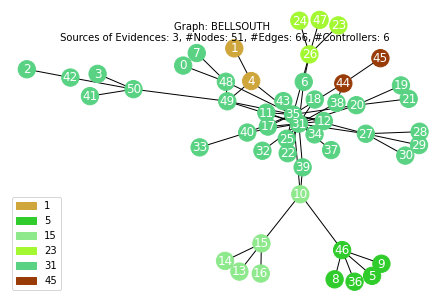

In [171]:
[[[plot_optimal_cluster_test(v2, g, k, k2,t) for k2, v2 in v.items()] for (
    n, g), (k, v) in zip(tqdm(gGrahps), clusters__pair.items())] for t in [2,3,4]]
os.startfile(r"C:/Users/rotim/Music/Yoruba/SOLA ALLYSON - ÌSÌN.mp3")


In [ ]:
set(clusters__pair_small['ABILENE'][2].keys())


{'0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'}

In [ ]:
# [(node, data) for node, data in G.nodes(data=True)]
node_strength_2_deg = [(i, sum(hub_information(G, i, 2)))
                       for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
degree__ = [(i, len(n_neighbor(G, i, 1))) for (i, j) in sorted(list(G.degree()),
                                                               key=lambda item: int(item[0]))]


In [ ]:
cluster_optimal_nodes_test(
    gGrahps[1][1], selected_nodes_based_on_source["ABVT"][4])


{'11': {'13', '14', '15', '16', '17', '18', '19', '21', '22'},
 '1': {'4', '6', '8', '9'},
 '0': {'7'},
 '2': {'10', '20', '3'},
 '5': {'12'}}

In [ ]:
G = gGrahps[1][1] #graph_collections[1]
sample__ = cluster_optimal_nodes_test(G, selected_nodes_based_on_source["ABVT"][4])
sample__

{'11': {'13', '14', '15', '16', '17', '18', '19', '21', '22'},
 '1': {'4', '6', '8', '9'},
 '0': {'7'},
 '2': {'10', '20', '3'},
 '5': {'12'}}

In [ ]:
# new_opti_rank_2
# Get the desired number of controllers from a sorted controller-switch allocation                                                    
sample__filtered = {k: v for k, v in [x for x in sorted(sample__.items(), key=lambda item: len(item[1]), reverse=True)][:3]}
print(sample__)
# factor_set
current_set_result_all = [(i,j) for i,j in sample__filtered.items()]
print(current_set_result_all)
# empty_controllers
empty_controllers = set().union(*[(set([i]).union(j)) for i, j in sample__.items() if i not in sample__filtered.keys()])

# residuals_controllers


{'11': {'16', '15', '13', '14', '17', '19', '18', '22', '21'}, '1': {'8', '9', '6', '4'}, '0': {'7'}, '2': {'3', '20', '10'}, '5': {'12'}}
[('11', {'16', '15', '13', '14', '17', '19', '18', '22', '21'}), ('1', {'8', '9', '6', '4'}), ('2', {'3', '20', '10'})]


In [ ]:


cluster_optimal_nodes_test(
    G, selected_nodes_based_on_source["ABVT"][2], is_filtered=True, filter_rank = 5)  #


{'11': {'13', '15', '16', '17', '18', '21', '22'},
 '1': {'4', '6', '7', '8', '9'},
 '10': {'14', '19', '2', '20', '3'},
 '5': {'0', '12'}}

In [ ]:
[(i, sum(hub_information(G, i, 1)))
 for (i, j) in sample__.items()]

average_case_c_s=[{source:(sum([nx.shortest_path_length(G, source, sub_target, weight='weight') for sub_target in target])/ (nx.number_of_nodes(G)-len(sample__)))} for source, target in sample__.items()]

worst_case_c_s=[{source: max([nx.shortest_path_length(G, source, sub_target, weight='weight') for sub_target in target]
               )} for source, target in sample__.items()]

# print([(s,x) for s,t in sample__.items() for x in t])
# print([[(s, x) for x in t]for s, t in sample__.items()])


In [ ]:
average_c_c = {s: set(sample__.keys())-set([s]) for s, t in sample__.items()}
# sample__.keys()
len_k = len(average_c_c)
average_case_c_c=[{source: (2*sum([nx.shortest_path_length(G, source, sub_target, weight='weight')
                        for sub_target in target])/(len_k**2 - len_k))} for source, target in average_c_c.items()]

worst_case_c_c = [{source: max([nx.shortest_path_length(G, source, sub_target, weight='weight') for sub_target in target]
                               )} for source, target in average_c_c.items()]

worst_case_c_c

[{'11': 133.00400000000002},
 {'1': 88.182},
 {'0': 90.846},
 {'2': 97.637},
 {'5': 133.00400000000002}]

In [ ]:
len_k

5